#***Introduction to Machine Learning: Supervised Learning****
Roberto Carrasco

Public github repository can be found at    https://github.com/rcarrasco8/House-Price-Predictions/blob/main/HousePricePredict.ipynb

#**Project Description**

Predicting Housing Prices.

We want to predict the sale price of houses in Ames, Iowa based on various features like overall quality, living area, number of garages, and year built.

This is a Regression problem. The target variable (house prices) is continuous.

Our final objective is to Develop a machine learning model to predict the final sale price of each house based on provided features.

#Dataset Description

Information on the dataset fields can be found on the "data_description.txt" file

#EDA and Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
train_data.shape

(1460, 81)

In [13]:
test_data.shape

(1459, 80)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

C:\Users\Roberto\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


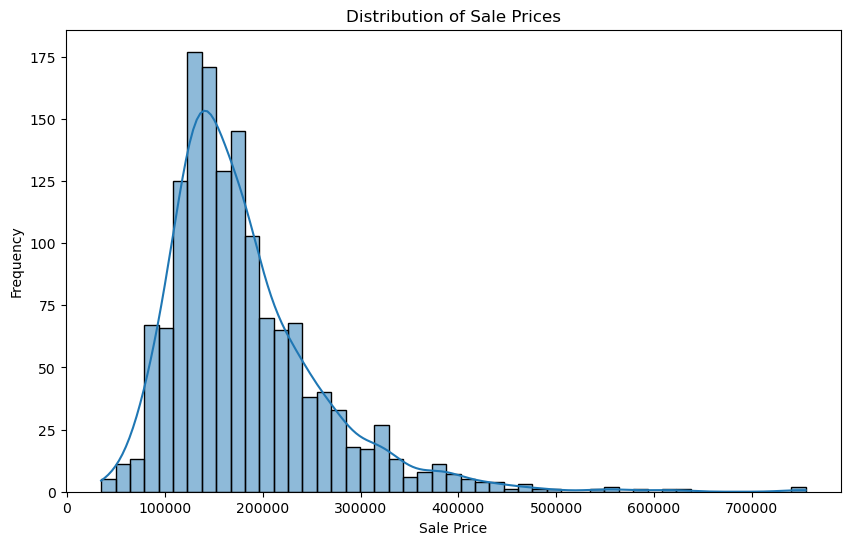

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


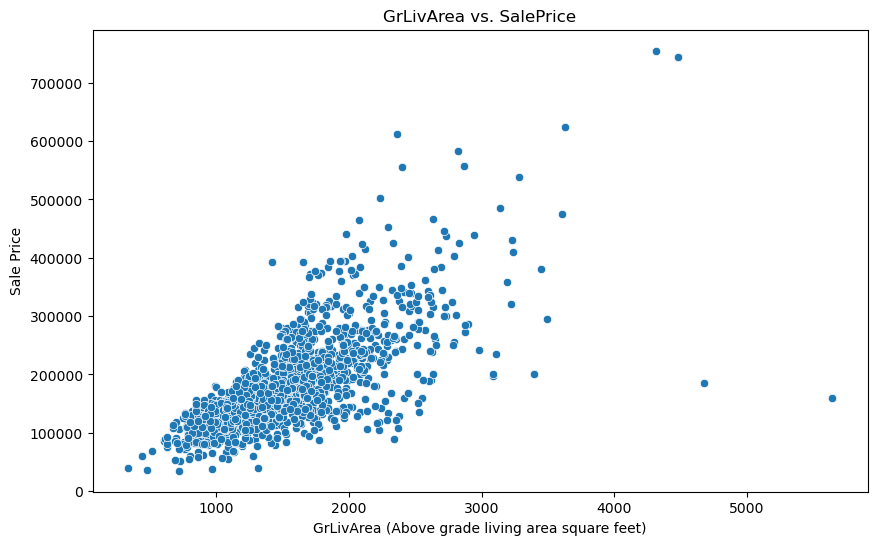

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.title('GrLivArea vs. SalePrice')
plt.xlabel('GrLivArea (Above grade living area square feet)')
plt.ylabel('Sale Price')
plt.show()


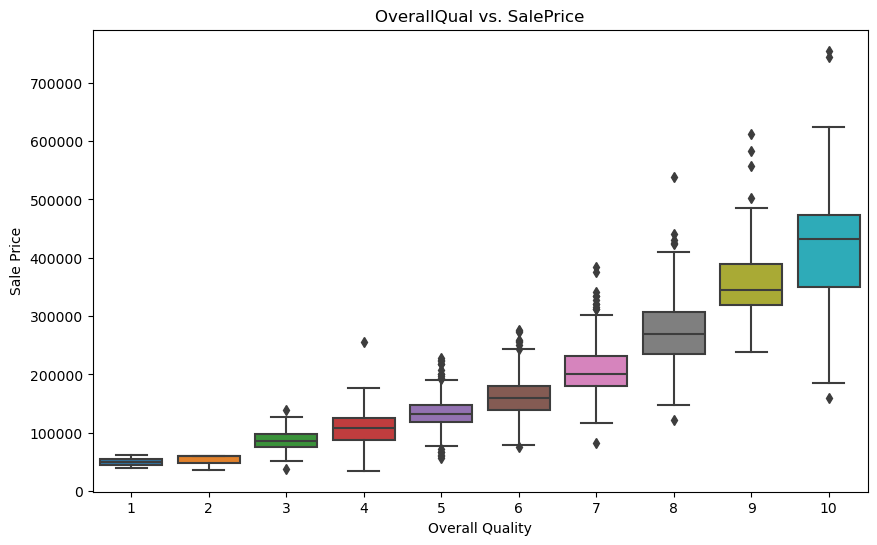

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.title('OverallQual vs. SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

Missing Values Handling

In [24]:
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [26]:
# Fill missing values for numerical features with the median
numeric_features = train_data.select_dtypes(include=[np.number])
for column in numeric_features.columns:
    train_data[column].fillna(train_data[column].median(), inplace=True)

# Fill missing values for categorical features with the mode
categorical_features = train_data.select_dtypes(include=[object])
for column in categorical_features.columns:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)

# Verify that there are no missing values left
print(train_data.isnull().sum().sum())

0


Encode Categorical Values for Linear Regression

In [29]:
# Encode categorical variables using existing pandads method
train_data = pd.get_dummies(train_data, drop_first=True)

# Display the first few rows of the processed training data
train_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


#Model Training and Refinement

train model and test using all features and evaluate MAE

In [33]:
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['SalePrice']), train_data['SalePrice'], test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
preds = model.predict(X_val)

mae = mean_absolute_error(y_val, preds)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 17481.776643835616


MSE is a little high we will try to maximize without overfitting

In [35]:
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance[:50])

                   Feature  Importance
4              OverallQual    0.557449
16               GrLivArea    0.120819
12             TotalBsmtSF    0.034973
14                2ndFlrSF    0.034354
9               BsmtFinSF1    0.029543
13                1stFlrSF    0.025664
3                  LotArea    0.016596
27              GarageArea    0.016203
26              GarageCars    0.012389
6                YearBuilt    0.011702
2              LotFrontage    0.008939
23            TotRmsAbvGrd    0.006751
213       GarageFinish_Unf    0.006686
29             OpenPorchSF    0.006546
7             YearRemodAdd    0.006396
19                FullBath    0.006163
25             GarageYrBlt    0.006055
11               BsmtUnfSF    0.005095
28              WoodDeckSF    0.004576
162            BsmtQual_Gd    0.004507
0                       Id    0.003967
195         KitchenQual_Gd    0.003952
189           CentralAir_Y    0.003946
8               MasVnrArea    0.003639
5              OverallCon

In [38]:
#threshold for feature importance
threshold = 0.001

#features above the threshold
important_features = feature_importance[feature_importance['Importance'] > threshold]['Feature']
X_train_reduced = X_train[important_features]

print(X_train_reduced.columns)

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
       '1stFlrSF', 'LotArea', 'GarageArea', 'GarageCars', 'YearBuilt',
       'LotFrontage', 'TotRmsAbvGrd', 'GarageFinish_Unf', 'OpenPorchSF',
       'YearRemodAdd', 'FullBath', 'GarageYrBlt', 'BsmtUnfSF', 'WoodDeckSF',
       'BsmtQual_Gd', 'Id', 'KitchenQual_Gd', 'CentralAir_Y', 'MasVnrArea',
       'OverallCond', 'Fireplaces', 'ScreenPorch', 'MoSold', 'MSSubClass',
       'LotShape_Reg', 'GarageType_Detchd', 'Neighborhood_Edwards',
       'ExterQual_Gd', 'BedroomAbvGr', 'BsmtExposure_Gd', 'YrSold',
       'KitchenQual_TA', 'BsmtExposure_No'],
      dtype='object')


In [40]:
model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
model_reduced.fit(X_train_reduced, y_train)

# Predict and evaluate
preds = model_reduced.predict(X_val[important_features])

mae1 = mean_absolute_error(y_val, preds)
print(f'Mean Absolute Error: {mae1}')

Mean Absolute Error: 17852.698904109588


In [41]:
print(f'Mean Absolute error difference after feature pruning based on importance: {mae - mae1}')

Mean Absolute error difference after feature pruning based on importance: -370.9222602739719


In [44]:
corr_matrix = X_train_reduced.corr()

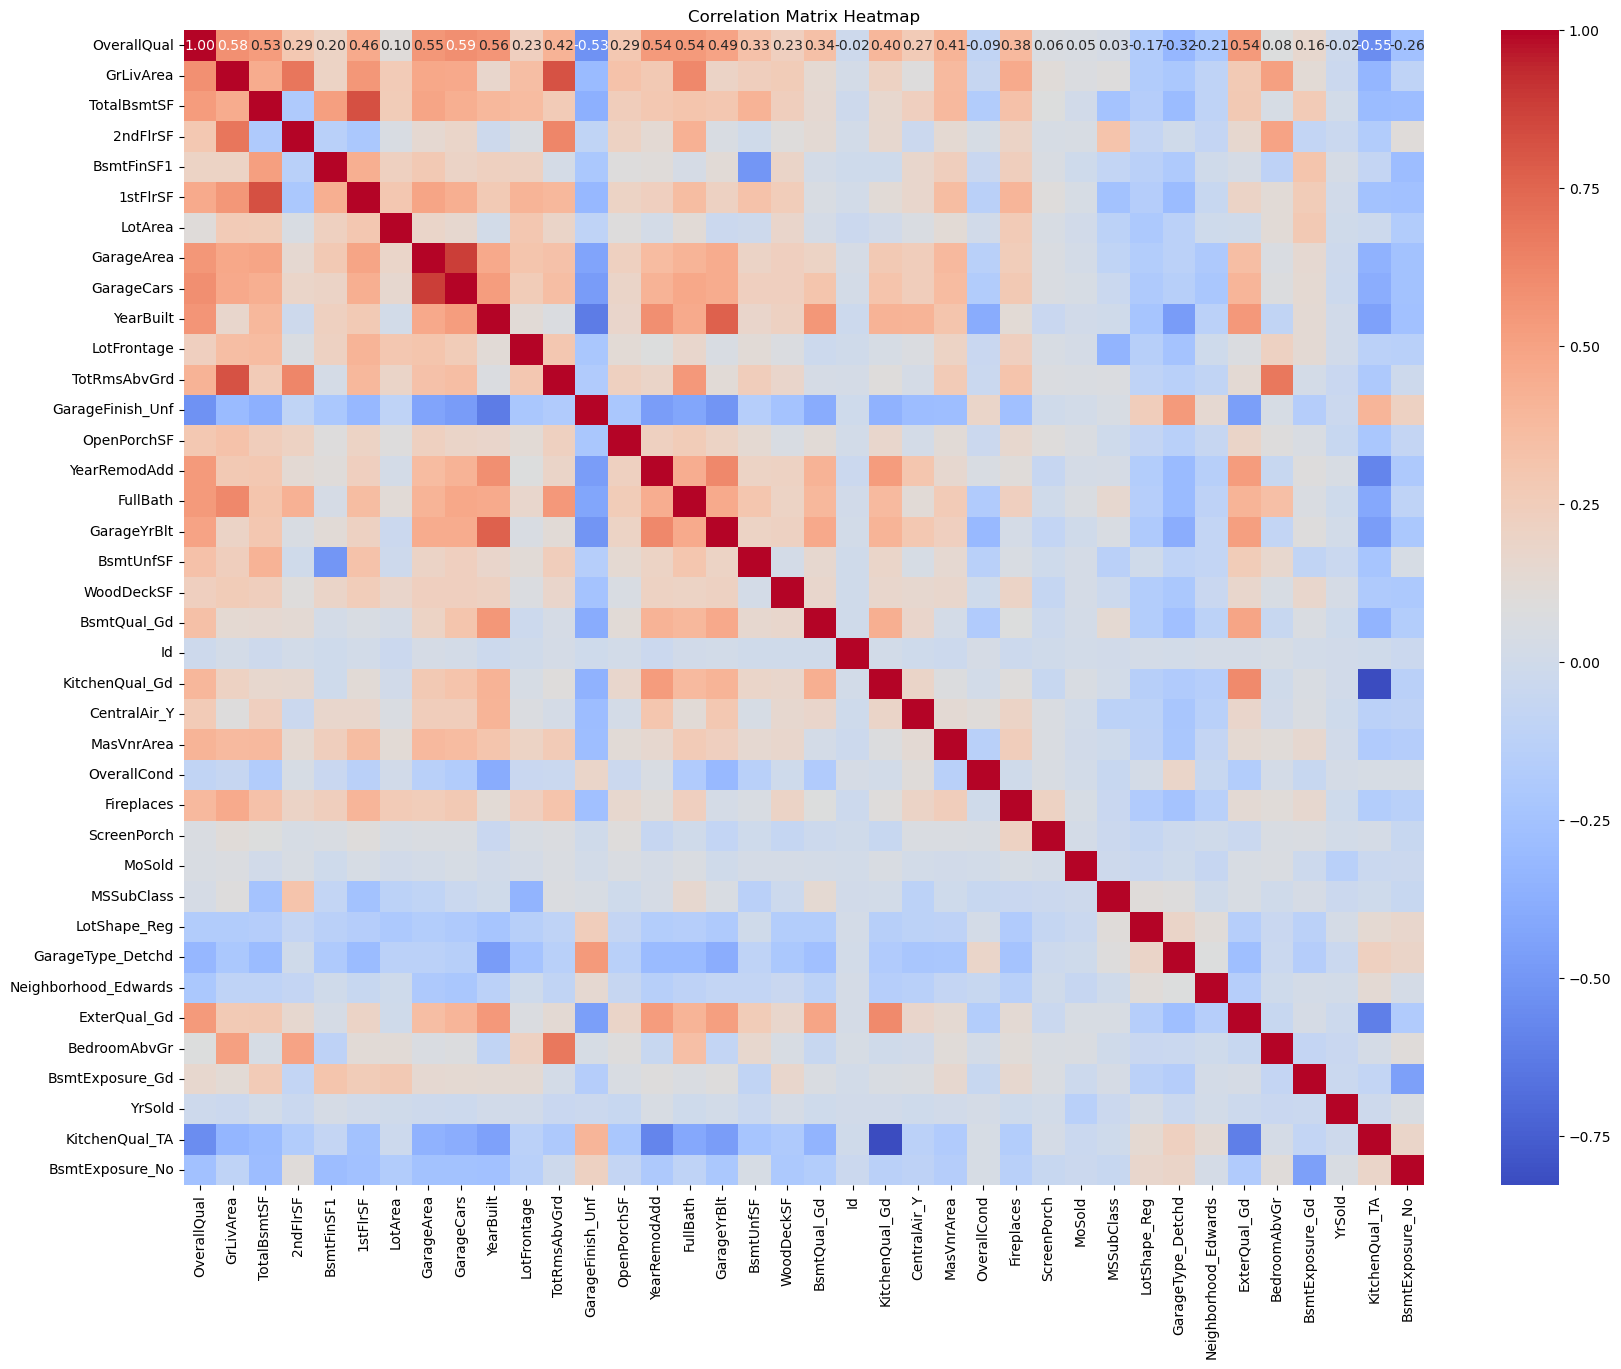

In [46]:
plt.figure(figsize=(20, 15))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

# Test_data Predictions

In [49]:
# Fill missing values for numerical features with the median
numeric_features = test_data.select_dtypes(include=[np.number])
for column in numeric_features.columns:
    test_data[column].fillna(test_data[column].median(), inplace=True)

# Fill missing values for categorical features with the mode
categorical_features = test_data.select_dtypes(include=[object])
for column in categorical_features.columns:
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

# Verify that there are no missing values left
print(test_data.isnull().sum().sum())

0


In [51]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,700,7,2006,WD,Normal


In [53]:
# Encode categorical variables using existing pandads method
test_data = pd.get_dummies(test_data, drop_first=True)

# Display the first few rows of the processed training data
test_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,False,True,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,False,True,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,False,True,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,False,True,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,False,True,False,False,False,True,False


In [55]:
training_features = train_data.drop(columns='SalePrice').columns
test_features = test_data.columns
missing_features = set(training_features) - set(test_features)
for feature in missing_features:
    test_data[feature] = 0



In [57]:
for column in important_features:
    if column not in test_data.columns:
        test_data[column] = 0

# Reorder columns to match the order in the training data
test_data = test_data[important_features]

In [59]:
test_data

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,GarageCars,YearBuilt,...,MSSubClass,LotShape_Reg,GarageType_Detchd,Neighborhood_Edwards,ExterQual_Gd,BedroomAbvGr,BsmtExposure_Gd,YrSold,KitchenQual_TA,BsmtExposure_No
0,5,896,882.0,0,468.0,896,11622,730.0,1.0,1961,...,20,True,False,False,False,2,False,2010,True,True
1,6,1329,1329.0,0,923.0,1329,14267,312.0,1.0,1958,...,20,False,False,False,False,3,False,2010,False,True
2,5,1629,928.0,701,791.0,928,13830,482.0,2.0,1997,...,60,False,False,False,False,3,False,2010,True,True
3,6,1604,926.0,678,602.0,926,9978,470.0,2.0,1998,...,60,False,False,False,False,3,False,2010,False,True
4,8,1280,1280.0,0,263.0,1280,5005,506.0,2.0,1992,...,120,False,False,False,True,2,False,2010,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,546.0,546,0.0,546,1936,0.0,0.0,1970,...,160,True,False,False,False,3,False,2006,True,True
1455,4,1092,546.0,546,252.0,546,1894,286.0,1.0,1970,...,160,True,False,False,False,3,False,2006,True,True
1456,5,1224,1224.0,0,1224.0,1224,20000,576.0,2.0,1960,...,20,True,True,False,False,4,False,2006,True,True
1457,5,970,912.0,0,337.0,970,10441,0.0,0.0,1992,...,85,True,False,False,False,3,False,2006,True,False


In [61]:
predictions = model_reduced.predict(test_data[important_features])
predictions

array([130715.83, 155893.5 , 176207.4 , ..., 159878.22, 117126.5 ,
       225899.39])

In [63]:
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
#submission.to_csv('submission.csv', index=False)